# Libraries import 

Import the libraries necessary for this lab. We can add some aliases to make the libraries easier to use in our code and set a default figure size for further plots.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#  Data Cleaning

Let's read the data and look at the first 5 rows using the head method. The number of the output rows from the dataset is determined by the head method parameter.

In [4]:
df = pd.read_csv('bank data.csv')
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### Identify missing values 

In [15]:
missing_data = df.isnull()
missing_data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Count the missing values in each column

In [18]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")
    

ID
False    2240
Name: ID, dtype: int64

Year_Birth
False    2240
Name: Year_Birth, dtype: int64

Education
False    2240
Name: Education, dtype: int64

Marital_Status
False    2240
Name: Marital_Status, dtype: int64

Income
False    2216
True       24
Name: Income, dtype: int64

Kidhome
False    2240
Name: Kidhome, dtype: int64

Teenhome
False    2240
Name: Teenhome, dtype: int64

Dt_Customer
False    2240
Name: Dt_Customer, dtype: int64

Recency
False    2240
Name: Recency, dtype: int64

MntWines
False    2240
Name: MntWines, dtype: int64

MntFruits
False    2240
Name: MntFruits, dtype: int64

MntMeatProducts
False    2240
Name: MntMeatProducts, dtype: int64

MntFishProducts
False    2240
Name: MntFishProducts, dtype: int64

MntSweetProducts
False    2240
Name: MntSweetProducts, dtype: int64

MntGoldProds
False    2240
Name: MntGoldProds, dtype: int64

NumDealsPurchases
False    2240
Name: NumDealsPurchases, dtype: int64

NumWebPurchases
False    2240
Name: NumWebPurchases, dtype: in

Based on the results above, each column has 2240 rows of data and only one of the columns contain missing data:

"Income" : 24 missing data

## Dealing with missing data 

The are two methods that we can use to deal with missing data:

(1) Drop data

(a) Drop the whole row

(b) Drop the whole column

(2) Replace data 

(a) Replace it by mean 

(b) Replace it by frequency

(c) Replace it based on other functions

Whole columns should be droppped if most entries are empty. In our dataset, none of the columns are empty enough to be dropped entirely. We will apply the replace data with mean method to the "Income" column.

In [19]:
# Calculate the mean for the Income column
avg_income = df["Income"].astype("float").mean()
print("Average Income:", avg_income)

Average Income: 52247.25135379061


In [20]:
# Replace NaN values with the mean value in the "Income" column
df["Income"].replace(np.nan, avg_income, inplace=True)

## Correct data format

The last step in cleaning our data is to ensure that all data is in the correct format (int, float, category or other)

In pandas, we use

.dtype() to check the data type

The last step in cleaning our data is to ensure that all data is in the correct format (int, float, category or other)

In pandas, we use

.dtype() to check the data type

.astype() to change the data type

Let's list the data type for each column

In [25]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

Now we have obtained a cleaned dataset with no missing values with all the data in its proper format.

# Dataset exploration

In this section we will explore the sourse dataset.

Let's read the data and look at the first 5 rows using the head method. The number of the output rows from the dataset is determined by the head method parameter.

In [2]:
df = pd.read_excel('Retailers data.xlsx')
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### Let's look at the dataset size, feature names and their types

In [3]:
df.shape

(2240, 29)

The dataset contains 2240 objects(rows), for each of which 29 features are set(columns)

### Attributing information

Output the column(feature) names:

In [4]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

To see the general information on all the DataFrame features (columns), we use the info method:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

The dataset contains 25 integer (int64), 1 real (float64) and 3 categorical and binary (object) features.

Method describe shows the main statistical characteristics of the dataset for each numerical feature (int64 and float64 types): the existing values number, mean, standard deviation, range, min & max, 0.25, 0.5 and 0.75 quartiles.

In [7]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


The Mean row shows the feature average, STD is an RMS (Root Mean Square) deviation, min,max - the minimum and maximum values, 25%, 50%, 75%- quarters that split the dataset (or part of it) into four groups containing approximately an equal number of observations (rows). 

To see the statistics on non-numeric features, you need to explicitly specify the feature types by the include parameter. You can also set include = all to output statistics on all the existing features.

In [8]:
df.describe(include='all')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,31-08-2012,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


The result shows that the average client refer is married (Marital_Status = Married) and has a university degree (Education = Graduation).

### Sorting 

A DataFrame can be sorted by a few feature values. In our case, for example, by Year_Birth (ascending = True for sorting in ascending order):

In [11]:
df.sort_values(by = "Year_Birth", ascending = True).head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,...,4,0,0,0,0,0,0,3,11,0
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,...,1,0,0,1,0,0,0,3,11,0
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,...,5,0,0,0,0,0,1,3,11,0
1950,6663,1940,PhD,Single,51141.0,0,0,08-07-2013,96,144,...,5,0,0,0,0,0,0,3,11,0
424,6932,1941,PhD,Married,93027.0,0,0,13-04-2013,77,1285,...,2,0,0,1,0,0,0,3,11,0


The sorting results show that the oldest calls customer was born in 1893 and is Single, in addition has an income of 60182.0 $\$$

## Pivot tables

In Pandas, pivot tables are implemented by the method pivot_table with such parameters:

    values – a list of variables to calculate the necessary statistics,
    index – a list of variables to group data,
    aggfunc — values that we actually need to count by groups - the amount, average, maximum, minimum or something else.

Let's find the average income for different types of customer education

In [47]:
df.pivot_table(values=["Income"],index=["Education"],aggfunc = "mean").head(5)

,Income
Education,
2n Cycle,47701.378099
Basic,20306.259259
Graduation,52715.755781
Master,52908.476370
PhD,56105.210405


The results above show that the average income increases with an increasing level of education

## Visualization in Pandas

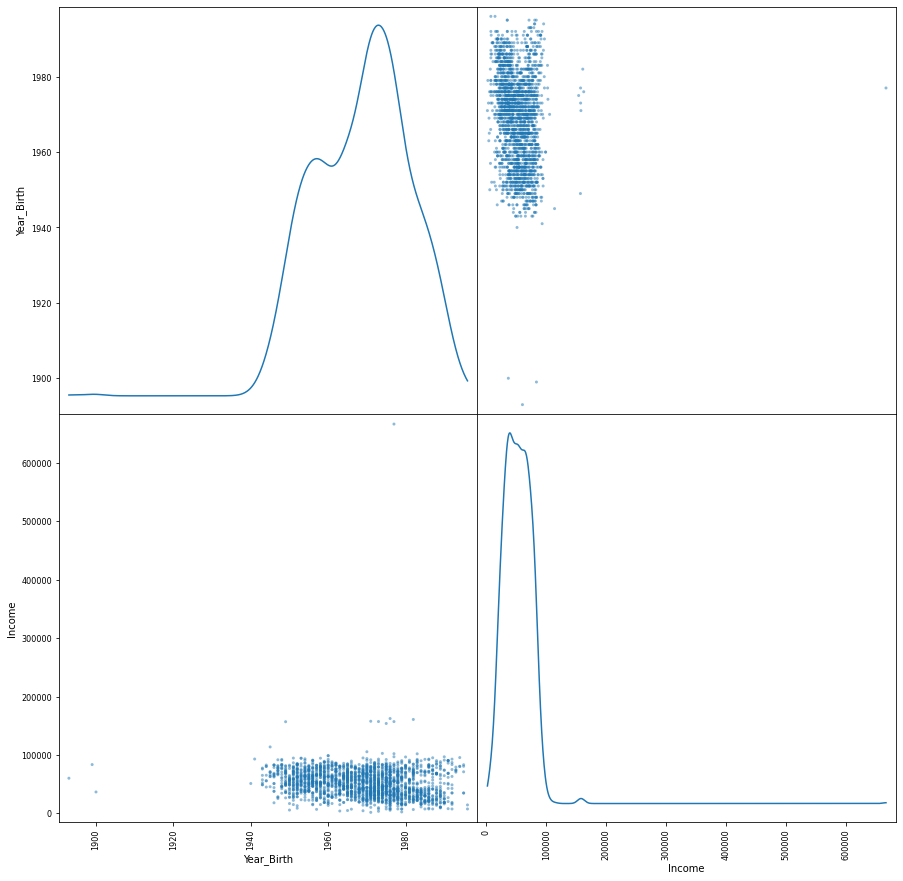

In [48]:
pd.plotting.scatter_matrix(
    df[["Year_Birth", "Income"]],
    figsize = (15, 15),
    diagonal = "kde")
plt.show()

A scatter matrix (pairs plot) compactly plots all the numeric variables we have in a dataset against each other. The plots on the main diagonal allow you to visually define the type of data distribution: the distribution is similar to normal for age, and for a call duration and the number of contacts, the geometric distribution is more suitable.

#### We also build a separate histogram for each feature:

Text(0.5, 0, 'Income')

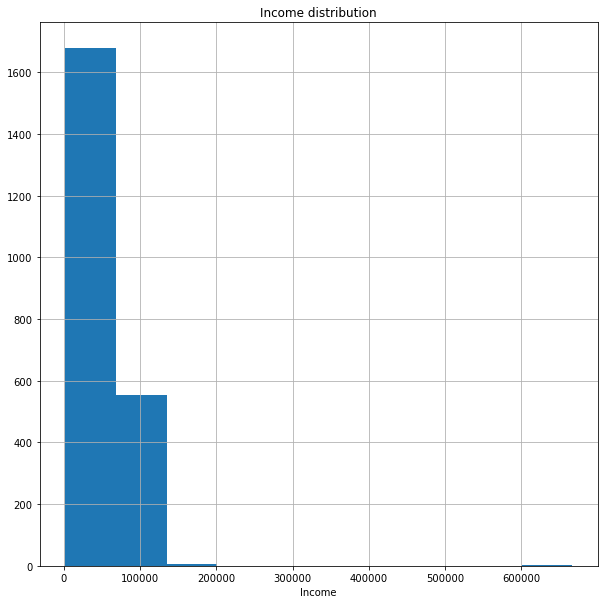

In [60]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 10)
df["Income"].hist()
plt.title('Income distribution')
plt.xlabel('Income')

The histogram shows that around 40 % of the customers earn between 0 - 55000 $\$$, while around 40 % - 60% of the customers earn between 55000 $\$$ - 120000 $\$$ with the remaining portion earning between 120000 $\$$ - 200000 $\$$.

#### Or we can also build it for all together:

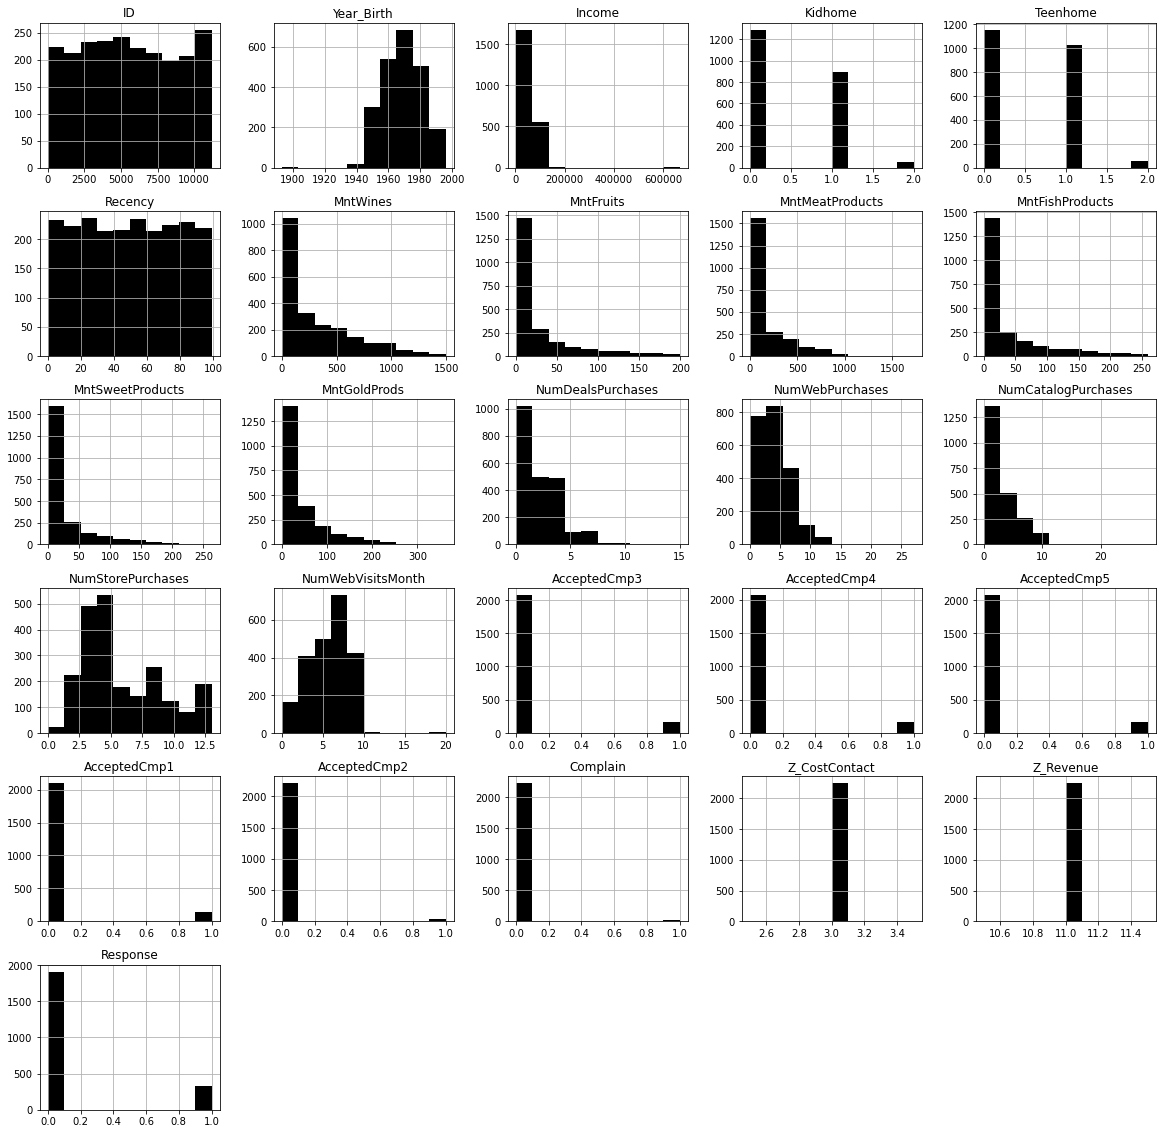

In [66]:
df.hist(color = "k",
        bins = 10,
        figsize = (20, 20))
plt.show()

A visual analysis of the histograms presented allows us to make preliminary assumptions about the variability of the source data.

While plots such as histogram are used mostly for continous variables, we may also want to investigate the relationship between 
categorical variables. One of the plots used to represent categorical variables is the Box and whisker plot.

Box and whisker plot is useful too. It allows you to compactly visualize the main characteristics of the feature distribution (the median, lower and upper quartile, minimal and maximum, outliers).

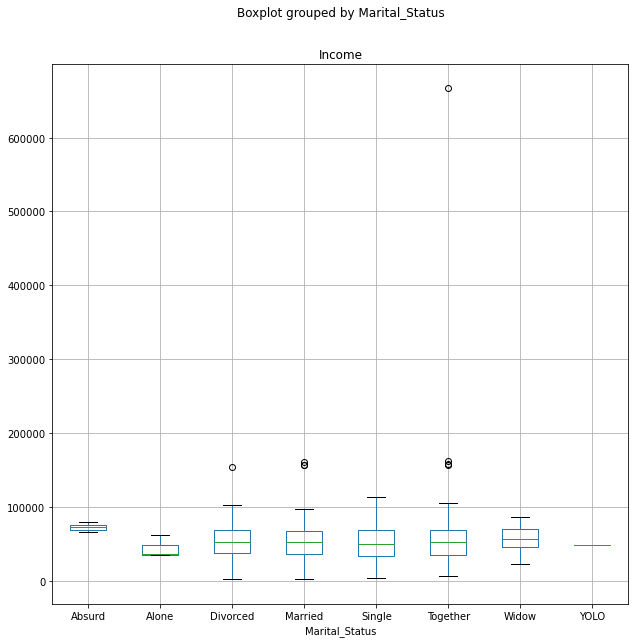

In [64]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 10)
df.boxplot(column = "Income",
           by = "Marital_Status")
plt.show()

The plot shows that Single customers on average earn less than the ones who are Married, together or Divorced. Whereas the ones belonging to the 'absurd' group on average earn higher when compared to the other groups. There is an outlier zone for the group s('Absurd', 'Alone' and 'Widow') over 100000 $\$$, and for the groups ('Divorced', 'Married', 'Single' and 'Together') over 200000 $\$$. 

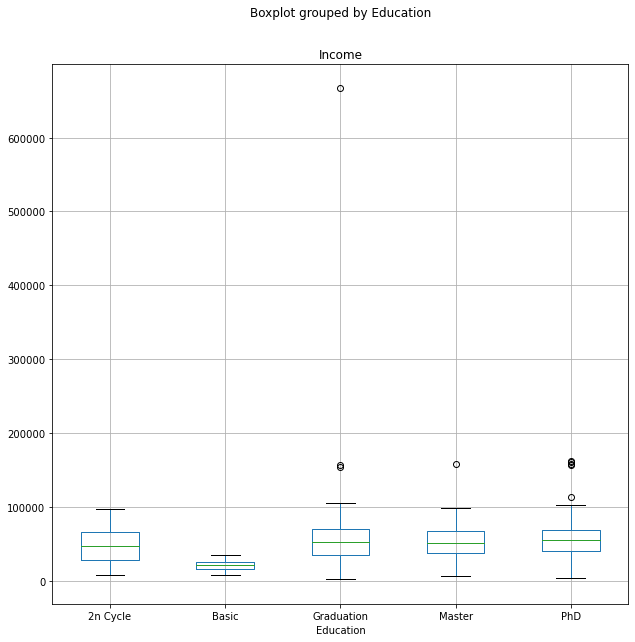

In [65]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 10)
df.boxplot(column = "Income",
           by = "Education")
plt.show()

The plot shows that customers with Basic education on average earn less than the customers belonging to the other groups. Whereas the ones belonging to the 'PhD' group on average earn higher when compared to the other groups. There is an outlier zone for the groups ('2n Cycle' and 'Basic') over 100000 $\$$ , and for the groups ('Graduation', 'Master'and 'PhD') over 200000 $\$$. 